In [14]:
import duckdb
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from obsq.utils.core import convert_df_to_gdf
path = "/home/etienne/projects/obsq/work/dev/data/data.duckdb"
target = 'expert_match'

pd.set_option('display.float_format', lambda x: '%.5f' % x)


In [15]:
table = 'combined'
schema = 'features'
con = duckdb.connect(path)
df = con.execute(f"""SELECT* FROM {schema}.{table}""" ).df()
#df = df.drop(columns= 'geom')
con.close()

In [24]:
df_pos = df[df['expert_match'] == 1]
df_neg = df[df['expert_match'] == 0]

In [16]:
def plot_mean_response(df, x):
    df.groupby(x)[target].mean().plot(kind="bar")
    plt.ylabel("P(y=1 | x)")
    plt.xlabel("x")
    plt.show()

In [17]:
def plot_cat_rate(df, cat_col):
    output = "home/etienne/projects/obsq/eda"
    rates = (
        df.groupby(cat_col)[target]
        .mean()
        .sort_values()
    )
    sns.barplot(x=rates.index[:20], y=rates.values[:20])
    plt.xticks(rotation=45, ha='right')   # or rotation=60, ha='right'
    plt.title(f"Observations rates for {cat_col}", fontsize=16)
    plt.savefig(f"{output}/{cat_col}_target_rates.jpg", dpi = 300, bbox_inches="tight")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39886 entries, 0 to 39885
Data columns (total 47 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   gbifID                              39886 non-null  int64  
 1   expert_match                        39886 non-null  int32  
 2   obsv_obs_count                      39886 non-null  int64  
 3   obsv_total_pct                      39886 non-null  float64
 4   obsv_expert_ids                     39886 non-null  int64  
 5   obsv_expert_ids_pct                 39886 non-null  float64
 6   obsv_expert_match_count             39886 non-null  int64  
 7   obsv_expert_match_pct               39886 non-null  float64
 8   obsv_avg_id_time                    39886 non-null  float64
 9   obsv_class_count                    39886 non-null  int64  
 10  obsv_order_count                    39886 non-null  int64  
 11  obsv_family_count                   39886

In [19]:
df.describe()

,gbifID,expert_match,obsv_obs_count,obsv_total_pct,obsv_expert_ids,obsv_expert_ids_pct,obsv_expert_match_count,obsv_expert_match_pct,obsv_avg_id_time,obsv_class_count,...,cmva_expert_id,tempo_day,tempo_month,tempo_year,meta_media_count,meta_coordinateUncertaintyInMeters,meta_pheno_01,meta_pheno_02,meta_pheno_03,meta_occurrenceRemarks
count,39886.00000,39886.00000,39886.00000,39886.00000,39886.00000,39886.00000,39886.00000,39886.00000,39886.00000,39886.00000,...,39886.00000,39886.00000,39886.00000,39886.00000,39886.00000,39886.00000,39886.00000,39886.00000,39886.00000,39886.00000
mean,4652105352.86988,0.06616,542.32360,0.01364,15.08650,0.04740,0.71965,0.01413,24.78067,3.84807,...,0.04728,15.86266,6.25124,2023.49265,17.26746,101.57770,0.16169,0.10227,0.00910,4.56303
std,717500937.25705,0.24857,949.69838,0.02389,23.44223,0.08595,0.44918,0.05408,48.78851,1.21310,...,0.21225,9.15706,1.25091,1.42943,12.73118,339.94187,0.36817,0.30300,0.09496,33.75805
min,3079585653.00000,0.00000,1.00000,0.00003,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,1.00000,4.00000,2021.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,4102946510.25000,0.00000,32.00000,0.00080,0.00000,0.00000,0.00000,0.00000,2.00000,3.00000,...,0.00000,7.00000,5.00000,2022.00000,10.00000,2.00000,0.00000,0.00000,0.00000,0.00000
50%,4902078740.00000,0.00000,143.00000,0.00360,3.00000,0.01700,1.00000,0.00190,11.00000,4.00000,...,0.00000,16.00000,6.00000,2024.00000,10.00000,6.00000,0.00000,0.00000,0.00000,0.00000
75%,5187908635.25000,0.00000,491.00000,0.01235,19.00000,0.05600,1.00000,0.00740,21.00000,5.00000,...,0.00000,24.00000,7.00000,2025.00000,20.00000,30.00000,0.00000,0.00000,0.00000,0.00000
max,5897886507.00000,1.00000,3389.00000,0.08525,88.00000,1.00000,1.00000,1.00000,1455.00000,5.00000,...,1.00000,31.00000,8.00000,2025.00000,240.00000,2998.00000,1.00000,1.00000,1.00000,2126.00000


In [20]:
df.var(numeric_only = True).sort_values(ascending=False)


gbifID                               514807594964748608.00000
histo_taxon_obs_ttl_count                       1688404.32748
obsv_obs_count                                   901927.00655
obsv_max_yearly_obs                              289248.46950
histo_taxon_obs_month_count                      120252.31270
meta_coordinateUncertaintyInMeters               115560.47363
obsv_avg_yearly_obs                               54729.41658
obsv_avg_coord_un                                 42389.40899
obsv_max_monthly_obs                              37726.52539
obsv_species_count                                13900.43122
cmva_id_time                                      11435.25388
obsv_genus_count                                   6525.32604
obsv_avg_monthly_obs                               5995.58230
obsv_avg_descr_len                                 5355.80580
obsv_unique_dates                                  4233.30331
obsv_max_species_obs_count                         3024.65914
obsv_avg

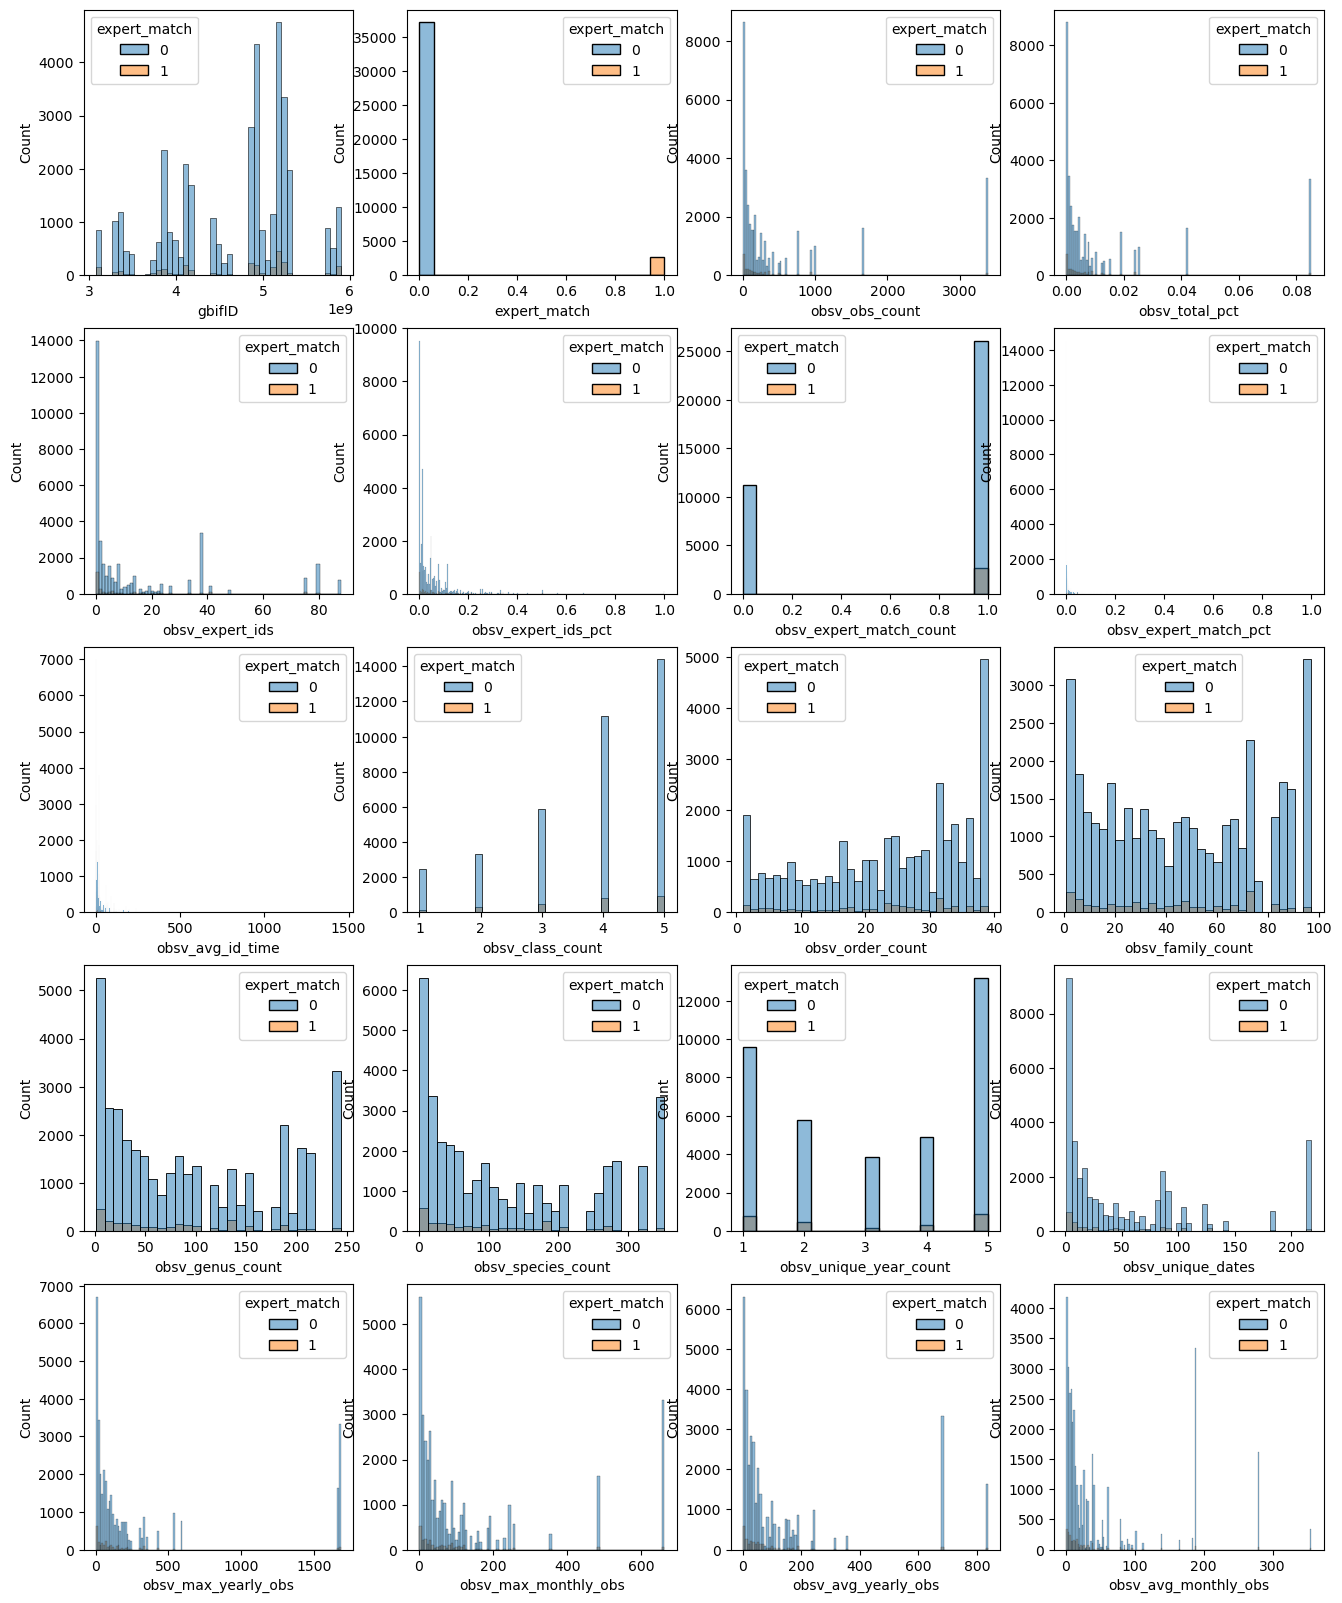

In [21]:
cols = 4
rows = 5
setup = {}
columns = df.select_dtypes(include='number').columns.tolist()

size = 4
f, axs = plt.subplots(rows,cols, figsize=(cols*size, rows*size), squeeze=False)
for i in range(0,rows):
    for j in range(0,cols):
        #print(i,j, (i*cols + j))
        index = i*cols + j
        if index > (cols*rows):
            break
        if columns[index] in ['latitude', 'longitude']:
            continue
        sns.histplot(df, hue = target, x = columns[index], ax=axs[i,j])


plt.show()

In [30]:
strong_sep = {}
moderate_sep = {}
low_sep = {}
skip = ['gbifID', 'expert_match']

for c in columns:
    if c in skip:
        continue 
    pos_mean = df_pos[c].mean()
    neg_mean = df_neg[c].mean()
    pos_std = df_pos[c].std()
    cohens_d = (pos_mean - neg_mean) / pos_std
    print(f"\n{c}: ", round(abs(cohens_d),3))
    if abs(cohens_d) > 0.5:
        print("  ✓ Strong separation - likely useful!")
    elif abs(cohens_d) > 0.2:
        print("  ⚠ Moderate separation - may be useful")
    else:
        print("  ✗ Weak separation - may not help")



obsv_obs_count:  0.47
  ⚠ Moderate separation - may be useful

obsv_total_pct:  0.47
  ⚠ Moderate separation - may be useful

obsv_expert_ids:  0.247
  ⚠ Moderate separation - may be useful

obsv_expert_ids_pct:  0.051
  ✗ Weak separation - may not help

obsv_expert_match_count:  inf
  ✓ Strong separation - likely useful!

obsv_expert_match_pct:  0.35
  ⚠ Moderate separation - may be useful

obsv_avg_id_time:  0.021
  ✗ Weak separation - may not help

obsv_class_count:  0.042
  ✗ Weak separation - may not help

obsv_order_count:  0.186
  ✗ Weak separation - may not help

obsv_family_count:  0.224
  ⚠ Moderate separation - may be useful

obsv_genus_count:  0.293
  ⚠ Moderate separation - may be useful

obsv_species_count:  0.293
  ⚠ Moderate separation - may be useful

obsv_unique_year_count:  0.08
  ✗ Weak separation - may not help

obsv_unique_dates:  0.277
  ⚠ Moderate separation - may be useful

obsv_max_yearly_obs:  0.476
  ⚠ Moderate separation - may be useful

obsv_max_monthly_o

/tmp/ipykernel_49796/3371359612.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  cohens_d = (pos_mean - neg_mean) / pos_std
